This code is taken from - https://krischer.github.io/seismo_live_build/html/Computational%20Seismology/The%20Finite-Difference%20Method/fd_taylor_operators_advanced_wrapper.html for learning purposes, all the credit goes to the respective owners, If i modify something I will mention it.

In [1]:
%matplotlib inline


import math
import numpy as np


def central_difference_coefficients(points, n):
    """
    Calculate the central finite difference stencil for an arbitrary number
    of points and an arbitrary order derivative.
    
    :param points: The number of points for the stencil. Must be
        an odd number.
    :param n: The derivative order. Must be a positive number.
    """
    if not points % 2: # if points%2 = 0, then not(points%2) = true then it will impy the following conditions
        raise ValueError("Only uneven number of points allowed.")
    if points <= n:
        raise ValueError("The %ith derivative requires at least %i points" %
                         (n, n + 2))
    a = points
    m = np.zeros((a, a))
    for i in range(a):
        for j in range(a):
            dx = j - a // 2
            m[i][j] = dx ** i
    
    s = np.zeros(a)
    s[n] = math.factorial(n)
    return np.linalg.solve(m, s)

In [2]:
range(3,20,2)

range(3, 20, 2)

In [3]:
list(range(3,20,2))

[3, 5, 7, 9, 11, 13, 15, 17, 19]

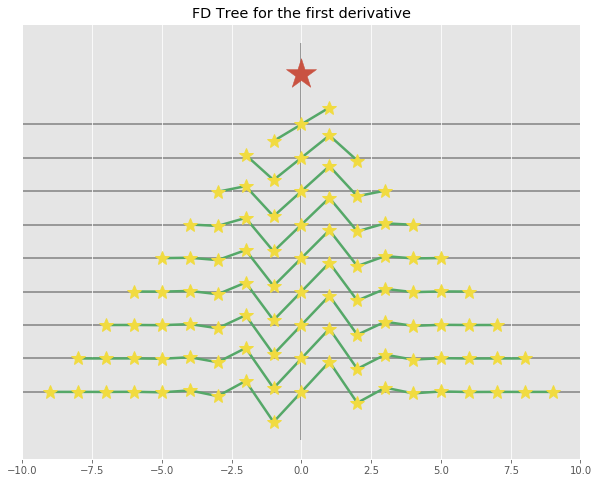

In [13]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

plt.figure(figsize=(10, 8))

for _i, points in enumerate(range(3, 20, 2)):      # points = [3,5,7,...19] 
    coeffs = central_difference_coefficients(points, 1)
    numbers = np.linspace(- (points // 2), points // 2, points)
    plt.plot(numbers, coeffs - _i * 1, color="#55A868", lw=2.5)
    plt.plot(numbers, coeffs - _i * 1, color="#F1DB40", lw=0, marker="*", markersize=15)
    plt.hlines(-(_i * 1), -100, 100, color="0.5", zorder=0) # plot vertical lines 
    
plt.scatter([0], [1.5], marker="*", s=1000, color="#C95241")

a
plt.yticks([])
plt.vlines(0, *plt.ylim(), color="0.5", zorder=0)
plt.xlim(-(points // 2 + 1), points // 2 + 1)
plt.ylim(-(_i + 2), 3)
plt.title("FD Tree for the first derivative")
plt.show()

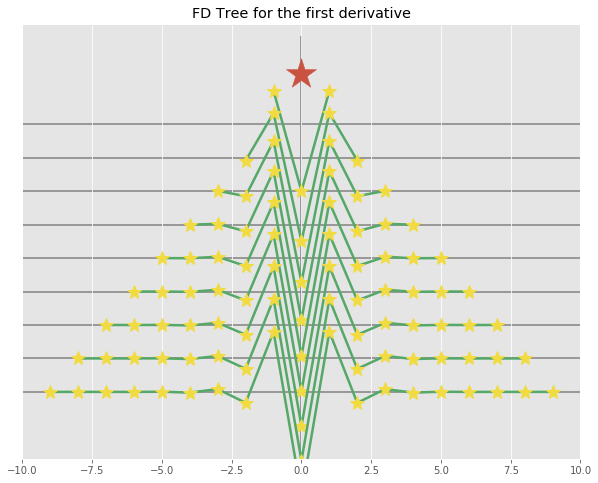

In [15]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

plt.figure(figsize=(10, 8))

for _i, points in enumerate(range(3, 20, 2)):      # points = [3,5,7,...19] 
    coeffs = central_difference_coefficients(points, 2)
    numbers = np.linspace(- (points // 2), points // 2, points)
    plt.plot(numbers, coeffs - _i * 1, color="#55A868", lw=2.5)
    plt.plot(numbers, coeffs - _i * 1, color="#F1DB40", lw=0, marker="*", markersize=15)
    plt.hlines(-(_i * 1), -100, 100, color="0.5", zorder=0) # plot vertical lines 
    
plt.scatter([0], [1.5], marker="*", s=1000, color="#C95241")
plt.yticks([])
plt.vlines(0, *plt.ylim(), color="0.5", zorder=0)
plt.xlim(-(points // 2 + 1), points // 2 + 1)
plt.ylim(-(_i + 2), 3)
plt.title("FD Tree for the first derivative")
plt.show()

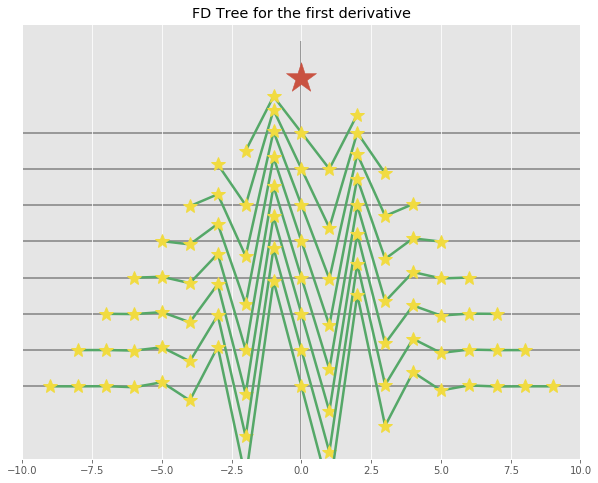

In [17]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

plt.figure(figsize=(10, 8))

for _i, points in enumerate(range(5, 20, 2)):      # points = [3,5,7,...19] 
    coeffs = central_difference_coefficients(points, 3)
    numbers = np.linspace(- (points // 2), points // 2, points)
    plt.plot(numbers, coeffs - _i * 1, color="#55A868", lw=2.5)
    plt.plot(numbers, coeffs - _i * 1, color="#F1DB40", lw=0, marker="*", markersize=15)
    plt.hlines(-(_i * 1), -100, 100, color="0.5", zorder=0) # plot vertical lines 
    
plt.scatter([0], [1.5], marker="*", s=1000, color="#C95241")
plt.yticks([])
plt.vlines(0, *plt.ylim(), color="0.5", zorder=0)
plt.xlim(-(points // 2 + 1), points // 2 + 1)
plt.ylim(-(_i + 2), 3)
plt.title("FD Tree for the first derivative")
plt.show()

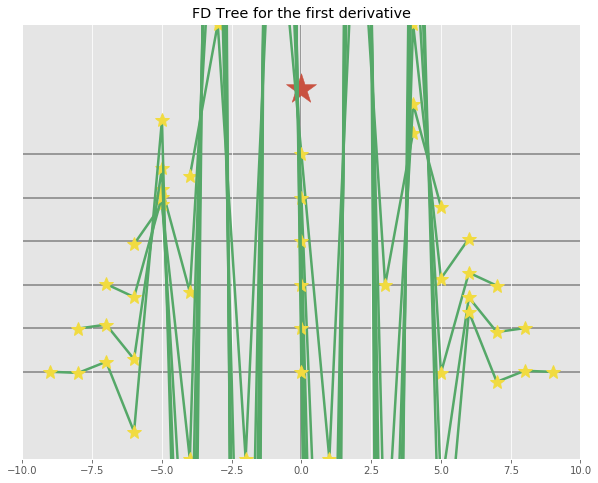

In [41]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

plt.figure(figsize=(10, 8))

for _i, points in enumerate(range(9, 20, 2)):      # points = [3,5,7,...19] 
    coeffs = central_difference_coefficients(points, 7)
    numbers = np.linspace(- (points // 2), points // 2, points)
    plt.plot(numbers, coeffs - _i * 1, color="#55A868", lw=2.5)
    plt.plot(numbers, coeffs - _i * 1, color="#F1DB40", lw=0, marker="*", markersize=15)
    plt.hlines(-(_i * 1), -100, 100, color="0.5", zorder=0) # plot vertical lines 
    
plt.scatter([0], [1.5], marker="*", s=1000, color="#C95241")
plt.yticks([])
plt.vlines(0, *plt.ylim(), color="0.5", zorder=0)
plt.xlim(-(points // 2 + 1), points // 2 + 1)
plt.ylim(-(_i + 2), 3)
plt.title("FD Tree for the first derivative")
plt.show()

In [42]:
def diff_helper(x, data, analytical_diff, stencil_length, diff_order):
    plt.close()
    dx = x[1] - x[0]
    
    plt.figure(figsize=(12, 5))
    plt.subplot(311)
    # Be super conservative about edge effect.
    buf = stencil_length // 2 + 1
    x = x[buf:-buf]
    plt.plot(x, data[buf:-buf], label="Function")
    plt.legend()

    stencil = central_difference_coefficients(stencil_length, diff_order)

    # Its effectively a convolution. So use a pre-built convolution function.
    diff = np.convolve(data, stencil[::-1])
    diff /= dx ** diff_order
    diff = diff[stencil_length // 2: -(stencil_length // 2)]


    plt.subplot(312)
    plt.plot(x, diff[buf:-buf], label="Numerical derivative", lw=2)
    plt.plot(x, analytical_diff[buf:-buf], ls="--", label="Analytic derivative")
    plt.legend()
    
    plt.subplot(313)
    plt.plot(x, (diff - analytical_diff)[buf:-buf], label="Numerical - Analytical Derivative")
    plt.legend()
    
    plt.tight_layout()
    plt.show()

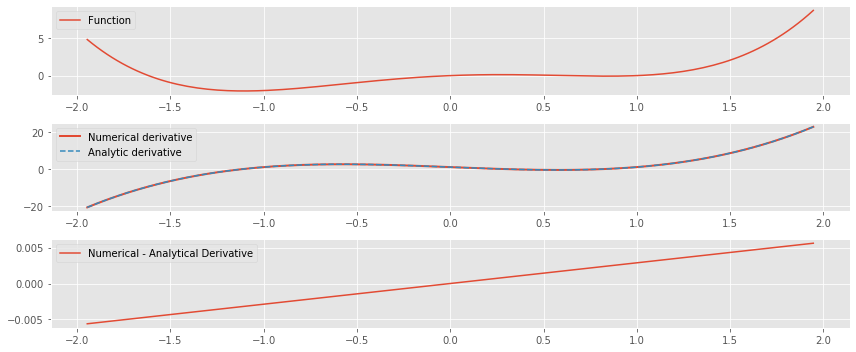

In [43]:
x = np.linspace(-2, 2, 150)
p = np.poly1d([1, 0, -2, 1, 0])
p_diff = np.poly1d([4, 0, -4, 1])
diff_helper(x, p(x), p_diff(x), 3, 1)

In [66]:
l = [2,4,6,8,10,12,14,16,18,20]
y = [4,16,36,64,100,144,196,256,324,400]
y1 = [4,8,12,16,20,24,28,32,36,40]
l1 = l[3:-3]

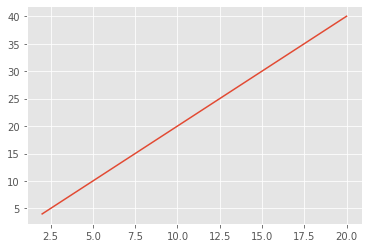

In [67]:
plt.plot(l,y1)

In [68]:
stencil = central_difference_coefficients(5, 2)

# Its effectively a convolution. So use a pre-built convolution function.
diff = np.convolve(y, stencil[::-1])
diff /= 2 ** 2
diff = diff[5// 2: -(5 // 2)]

In [69]:
diff

array([   2.08333333,    2.        ,    2.        ,    2.        ,
          2.        ,    2.        ,    2.        ,    2.        ,
         12.08333333, -147.33333333])

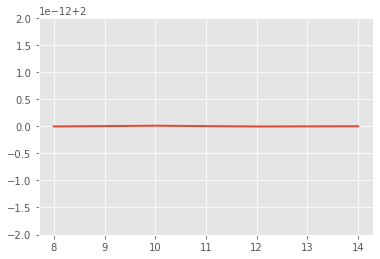

In [71]:
plt.plot(l1, diff[buf:-buf], label="Numerical derivative", lw=2)